# Pharmaceutical Reviews - 02a - EDA - All Conditions

Below, I will observe information regarding each of the drugs and conditions. Once this information is held, I will choose 1 condition of focus, and will continue on to use NLP with Sentiment Analysis, and to create models.

## Data Import

In [1]:
#imports necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
 #imports data as a dataframe

file_path = '../data/drugsCom_CLEAN.csv'

reviews = pd.read_csv(file_path)

In [3]:
reviews.head()

,drug,condition,review,rating,usefulcount
0,Medroxyprogesterone,Amenorrhea,"""I&#039;m 21 years old and recently found out ...",10.0,11
1,Medroxyprogesterone,Abnormal Uterine Bleeding,"""I have been on the shot 11 years and until a ...",8.0,7
2,Medroxyprogesterone,Birth Control,"""Ive had four shots at this point. I was on bi...",9.0,12
3,Medroxyprogesterone,Abnormal Uterine Bleeding,"""I had a total of 3 shots. I got my first one ...",1.0,4
4,Medroxyprogesterone,Abnormal Uterine Bleeding,"""I&#039;m 18 and got this for heavy bleeding. ...",5.0,6


## EDA by Column

### 1. Drug

In [4]:
reviews.head()

,drug,condition,review,rating,usefulcount
0,Medroxyprogesterone,Amenorrhea,"""I&#039;m 21 years old and recently found out ...",10.0,11
1,Medroxyprogesterone,Abnormal Uterine Bleeding,"""I have been on the shot 11 years and until a ...",8.0,7
2,Medroxyprogesterone,Birth Control,"""Ive had four shots at this point. I was on bi...",9.0,12
3,Medroxyprogesterone,Abnormal Uterine Bleeding,"""I had a total of 3 shots. I got my first one ...",1.0,4
4,Medroxyprogesterone,Abnormal Uterine Bleeding,"""I&#039;m 18 and got this for heavy bleeding. ...",5.0,6


#### Most Commonly Reviewed Drugs

In [5]:
reviews.drug.value_counts()

Levonorgestrel                       3657
Etonogestrel                         3336
Ethinyl estradiol / norethindrone    2850
Nexplanon                            2156
Ethinyl estradiol / norgestimate     2117
                                     ... 
D3                                      1
Sucroferric oxyhydroxide                1
Nutraplus                               1
Purinethol                              1
Privigen                                1
Name: drug, Length: 3436, dtype: int64

It appears that the most commonly reviewed drugs are Levonorgestrel, Etonogestrel, Ethinyl estradiol, norethindrone, Nexplanon, and Ethinyl estradiol / norgestimate.

It may be of use to look more closely at the reviews for these drugs.

I will create a subset.

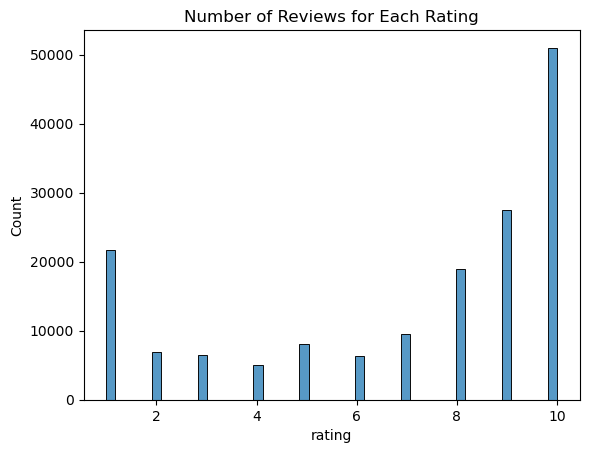

In [6]:
sns.histplot(data = reviews, x='rating').set(title = 'Number of Reviews for Each Rating');

In [7]:
#creates the subset as described

common = reviews.loc[(reviews['drug'] == 'Levonorgestrel') | (reviews['drug'] == 'Etonogestrel')
                  | (reviews['drug'] == 'Ethinyl estradiol') |  (reviews['drug'] == 'norethindrone') | 
                  (reviews['drug'] == 'Nexplanon') |(reviews['drug'] == 'Ethinyl estradiol / norgestimate') ]

common.head() #displays top 5 rows of subset

,drug,condition,review,rating,usefulcount
30474,Ethinyl estradiol / norgestimate,Birth Control,"""I&#039;ve been on Sprintec for three years no...",3.0,10
30475,Ethinyl estradiol / norgestimate,Unspecified,"""I was on Sprintec for about a year. It caused...",4.0,0
30476,Ethinyl estradiol / norgestimate,Birth Control,"""For me I had regular periods but quite heavy ...",4.0,11
30477,Ethinyl estradiol / norgestimate,Birth Control,"""I&#039;ve been on TriNessa for the past 5 mon...",2.0,8
30478,Ethinyl estradiol / norgestimate,Unspecified,"""I have been on Trinessa for 3 months. Everyth...",2.0,6


In [8]:
common = pd.DataFrame(common) #converts the subset into a dataframe

Now, I will make observations about these commonly reviewed drugs.

##### Commonly Reviewed - Drugs

Below, I will show a histogram displaying the number of reviews for each drug.

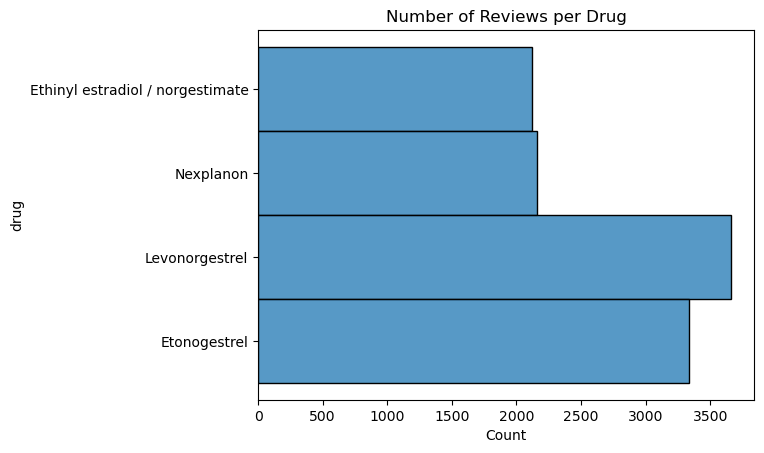

In [9]:
sns.histplot(data = common, y='drug').set(title = 'Number of Reviews per Drug');

As shown in the value counts above, Levonorgestrel is the most commonly reviewed, followed by Etonogestrel, Nexplanon, and Ethinyl estradiol / norgestimate.

I will take a closer look at which conditions are represented within this subset.

##### Commonly reviewed - Conditions

In [10]:
common.condition.nunique() #shows the number of unique conditions for which the drugs were prescribed

14

There are only 13 unique conditions. I will show a normalized value count to see representation of each condition for these commonly reviewed drugs.

In [11]:
common.condition.value_counts(normalize= True)

Birth Control                                 0.814131
Emergency Contraception                       0.108379
Abnormal Uterine Bleeding                     0.037635
Acne                                          0.019084
Unspecified                                   0.011095
Ovarian Cysts                                 0.004793
Endometriosis                                 0.003639
Not Listed / Othe                             0.000621
8</span> users found this comment helpful.    0.000178
4</span> users found this comment helpful.    0.000089
2</span> users found this comment helpful.    0.000089
1</span> users found this comment helpful.    0.000089
9</span> users found this comment helpful.    0.000089
3</span> users found this comment helpful.    0.000089
Name: condition, dtype: float64

It appears that Birth Control represents 82% of the conditions for which the drugs were prescribed.

(I also see the "users found this comment helpful" values...these will be addressed when I address the conditions column as a whole.)

##### Commonly reviewed - Rating

Below, I will show a bar graph showing the mean rating for each drug.

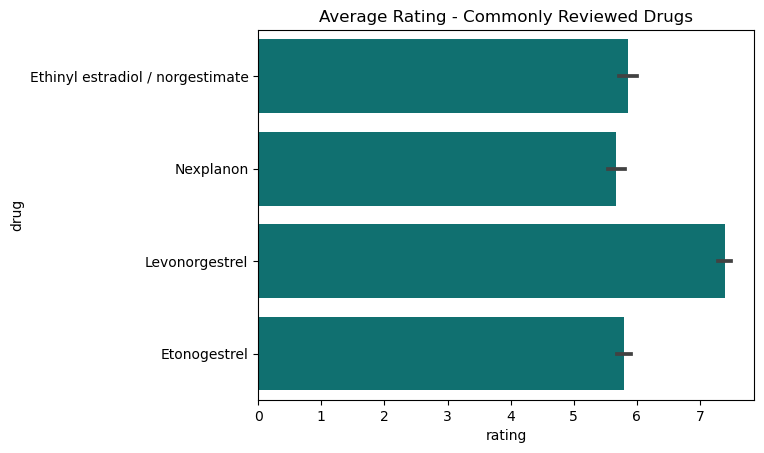

In [12]:
sns.barplot(data = common, x = 'rating', y = 'drug', orient = 'h', color = 'teal').set(
    title = 'Average Rating - Commonly Reviewed Drugs');

It appears that of these commonly reviewed drugs, Levonorgestrel has the highest average rating at just more than 7, while Nexplanon has the lowest. 

I will show the specific values in a group-by below.

In [13]:
common.groupby('drug')['rating'].mean()

drug
Ethinyl estradiol / norgestimate    5.856873
Etonogestrel                        5.802458
Levonorgestrel                      7.391031
Nexplanon                           5.673006
Name: rating, dtype: float64

It can now be seen in a different format that Levonorgestrel has the highest rating, with the other drugs falling between 5 and 6 in their mean ratings.

It was determined during preliminary analysis that the dataset average rating is 6.99. In this case, then, Levonogestrel's rating is above average, while the other drugs fall below.

Having learned this, I will next learn more about the most highly rated drugs in the dataset.

##### Commonly Reviewed - Useful Count

Below, I will observe to see the average useful count for each commonly reviewed drug.

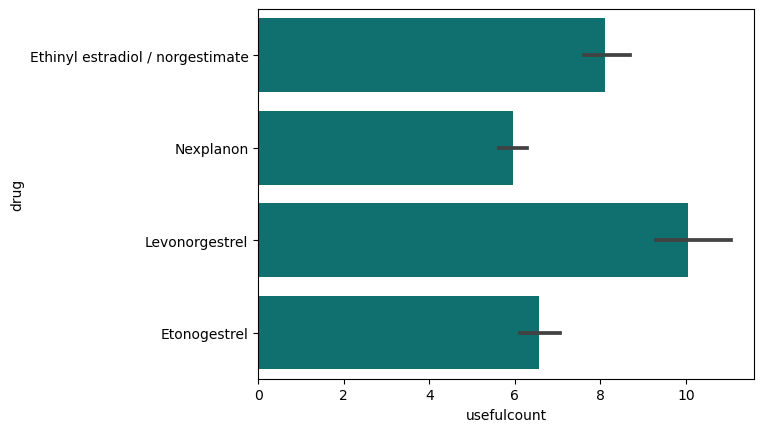

In [14]:
sns.barplot(data = common, x= 'usefulcount', y = 'drug', orient = 'h', color = 'teal');

It appears that the highest number of readers found the Levonorgestrel reviews to be useful, and the least number of readers found Nexplanaon reviews to be useful.

Meanwhile, it might be worthwhile to observe reviews representing a smaller number of conditions. I will explore this next below.

### 2. Condition

In [15]:
reviews.head()

,drug,condition,review,rating,usefulcount
0,Medroxyprogesterone,Amenorrhea,"""I&#039;m 21 years old and recently found out ...",10.0,11
1,Medroxyprogesterone,Abnormal Uterine Bleeding,"""I have been on the shot 11 years and until a ...",8.0,7
2,Medroxyprogesterone,Birth Control,"""Ive had four shots at this point. I was on bi...",9.0,12
3,Medroxyprogesterone,Abnormal Uterine Bleeding,"""I had a total of 3 shots. I got my first one ...",1.0,4
4,Medroxyprogesterone,Abnormal Uterine Bleeding,"""I&#039;m 18 and got this for heavy bleeding. ...",5.0,6


I will begin by re-displaying the value counts for this condition so that we can explore those conditions that are most commonly represented in this dataset.

In [16]:
reviews.condition.value_counts()

Birth Control                  28788
Depression                      9069
Pain                            6145
Anxiety                         5904
Acne                            5588
                               ...  
Hypercalcemia                      1
Joint Infection                    1
Ehrlichiosis                       1
Q Feve                             1
Aspergillosis, Aspergilloma        1
Name: condition, Length: 885, dtype: int64

Birth Control is most common, followed by Depression, Pain, Anxiety, and Acne.

I will create a subset of each of these to observe patterns for each of the common conditions listed above.

#### Most Common Conditions - Total

In [17]:
#creates subset as described

commonc = reviews.loc[(reviews['condition']== 'Birth Control') | (reviews['condition']== 'Depression') |
                    (reviews['condition']== 'Pain') | (reviews['condition']== 'Anxiety') | 
                     (reviews['condition']== 'Acne')]

commonc.head() #displays top 5 rows of subset

,drug,condition,review,rating,usefulcount
2,Medroxyprogesterone,Birth Control,"""Ive had four shots at this point. I was on bi...",9.0,12
9,Medroxyprogesterone,Birth Control,"""I started the Depo shot a year ago. Originall...",2.0,7
13,Medroxyprogesterone,Birth Control,"""I had one injection in June 2012 after seeing...",5.0,2
14,Medroxyprogesterone,Birth Control,"""I was on depo provera from the ages of 15-18....",3.0,2
18,Medroxyprogesterone,Birth Control,"""I&#039;m currently on the depo shot. I had my...",1.0,0


The specific drugs presecribed for each condition will be described when I explore each of these specific conditions below. For now, I will look at other attributes of this subset.

##### Most Common Conditions - Distribution of Conditions

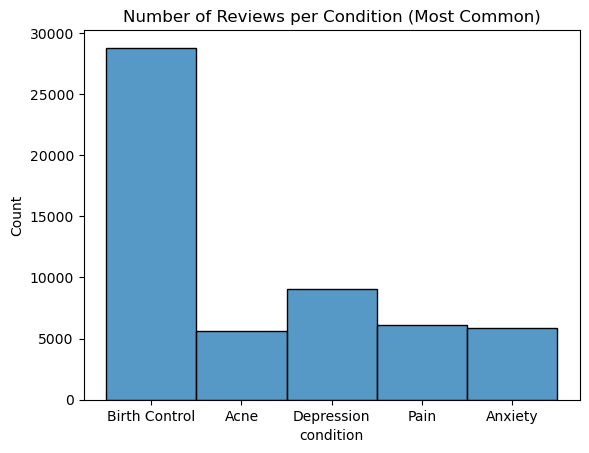

In [18]:
sns.histplot(data = commonc, x='condition').set(title = 'Number of Reviews per Condition (Most Common)');

This visualization makes it easy to see the relative number of reviews for Birth Control drugs, which is far higher than the number of reviews for any other conditions in this dataset.

##### Most Common Conditions - Average Rating

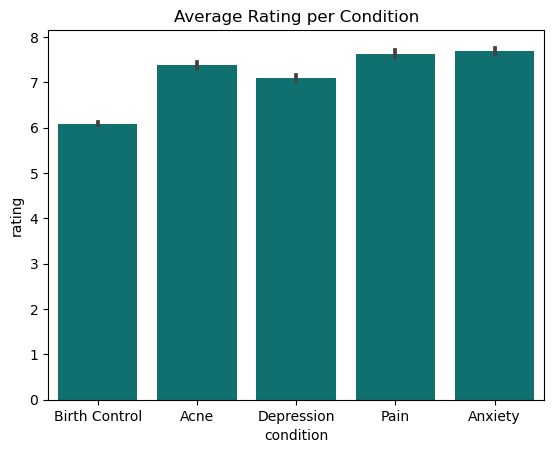

In [19]:
sns.barplot(data = commonc, x='condition', y='rating', color = 'teal').set(title = 'Average Rating per Condition');

In [20]:
commonc.groupby('condition')['rating'].mean()

condition
Acne             7.374195
Anxiety          7.691057
Birth Control    6.089933
Depression       7.099460
Pain             7.632221
Name: rating, dtype: float64

The visualization table above show that the mean rating for Birth Control is lowest, at just more than 6 (below average), while the other common conditions have mean ratings that fall in the 7-range (above average.)

As each of these conditions is distinct, further analysis of each should be seperate. Below, I will observe subsets of the dataset for each condition.

#### Most Common Conditions - Average Useful Count

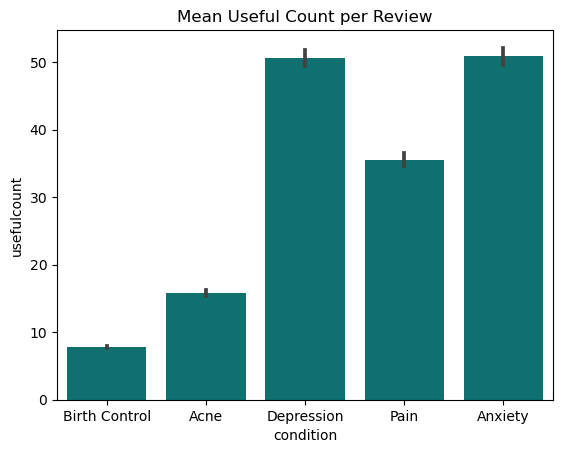

In [21]:
sns.barplot(data = commonc, x='condition', y = 'usefulcount', color = 'teal').set(
    title = 'Mean Useful Count per Review');

It appears that people more commonly found reviews of Depression and Anxiety medications to be useful than, for example, Birth Control, which has the smallest mean useful count.

#### Birth Control

This is the condition most frequently seen in this dataset. Below, I will create a dataframe for further exploration.

In [22]:
birthcontrol = reviews.loc[reviews['condition']== 'Birth Control']
                          
birthcontrol.head()

,drug,condition,review,rating,usefulcount
2,Medroxyprogesterone,Birth Control,"""Ive had four shots at this point. I was on bi...",9.0,12
9,Medroxyprogesterone,Birth Control,"""I started the Depo shot a year ago. Originall...",2.0,7
13,Medroxyprogesterone,Birth Control,"""I had one injection in June 2012 after seeing...",5.0,2
14,Medroxyprogesterone,Birth Control,"""I was on depo provera from the ages of 15-18....",3.0,2
18,Medroxyprogesterone,Birth Control,"""I&#039;m currently on the depo shot. I had my...",1.0,0


In [23]:
birthcontrol.shape

(28788, 5)

##### Birth Control - Most Frequently Reviewed Drugs

I would like to discover which drugs are most commonly reviewed for this condition.

I will first observe normalized value counts below.

In [24]:
birthcontrol.drug.value_counts()

Etonogestrel                          3314
Ethinyl estradiol / norethindrone     2337
Nexplanon                             2149
Levonorgestrel                        2129
Ethinyl estradiol / levonorgestrel    1600
                                      ... 
Pirmella 1 / 35                          1
Rajani                                   1
Larissia                                 1
Norlyda                                  1
Amethia Lo                               1
Name: drug, Length: 172, dtype: int64

The top 5 drugs are the same as those viewed as most common in the overall dataset. This makes sense, as it appears Birth Control is the condition most frequently reviewed in this dataset.

Average ratings for these drugs were determined above. I will move on to observe reviews for this subset.

##### Birth Control - Ratings

Now I will observe a histogram of ratings for this condition.

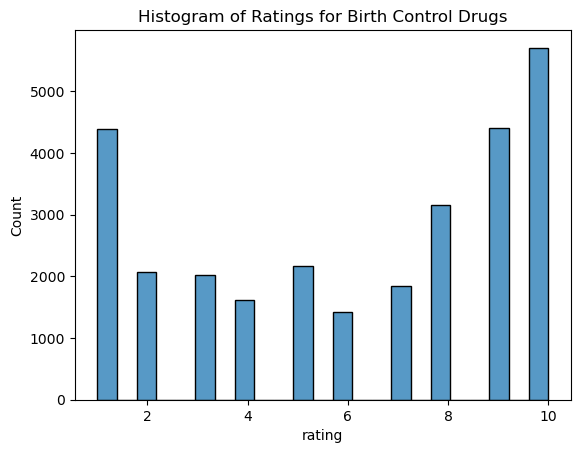

In [25]:
sns.histplot(data = birthcontrol, x='rating').set(title ='Histogram of Ratings for Birth Control Drugs');

The birth control drugs had 10 and 9 as their most common ratings, followed by a rating of 1.

As noted earlier, much was determined regarding the common birth control drugs above, as they were the most frequently reviewed in this dataset. As such, I will move on to observe information for the next most frequent condition, which is Depression

#### Highest Rated Birth Control Medications

In [26]:
birthcontrol.groupby('drug')['rating'].mean().sort_values(ascending = False).head(15)

drug
Provera                  10.000000
Plan B                   10.000000
Elinest                  10.000000
Heather                   9.750000
Ortho-Novum 7 / 7 / 7     9.666667
Ortho-Novum 1 / 35        8.500000
Femcon Fe                 8.166667
Introvale                 8.000000
Zenchent                  8.000000
Rajani                    8.000000
Microgestin 1.5 / 30      8.000000
Loestrin Fe 1.5 / 30      8.000000
Lybrel                    7.888889
Junel Fe 24               7.666667
Ortho Evra                7.470320
Name: rating, dtype: float64

The 15 highest rated medications range from 7.47 to 10.00.

#### Lowest Rated Birth Control Medications

In [27]:
birthcontrol.groupby('drug')['rating'].mean().sort_values(ascending = True).head(15)

drug
depo-subQ provera 104    1.000000
Tri-Lo-Estarylla         1.000000
Pirmella 1 / 35          1.000000
Amethyst                 1.000000
Philith                  1.000000
Necon 7 / 7 / 7          1.000000
Mibelas 24 Fe            1.000000
Larin 24 Fe              1.000000
Jencycla                 1.000000
Enskyce                  1.000000
Amethia Lo               2.000000
Necon 1 / 50             2.666667
Tri-Lo-Marzia            3.000000
Dasetta 1 / 35           3.000000
Loestrin 21 1.5 / 30     3.000000
Name: rating, dtype: float64

The 15 lowest-rated medications range from 1.00 to 3.00.

#### Drugs with Most Useful Reviews

I am interested to see which drugs had reviews that the highest number of people found useful. I will determine this below.

In [28]:
birthcontrol.groupby('drug')['usefulcount'].mean().sort_values(ascending = False)

drug
Lybrel                   28.111111
Heather                  18.250000
Ortho Micronor           17.540000
Mirena                   14.568912
Nora-Be                  14.442308
                           ...    
Loestrin Fe 1.5 / 30      0.000000
Necon 7 / 7 / 7           0.000000
Lomedia 24 Fe             0.000000
Caziant                   0.000000
depo-subQ provera 104     0.000000
Name: usefulcount, Length: 172, dtype: float64

I see that Lybrel, Heather, Ortho Micronor, Mirena, and Nora-Be have the highest average useful count.

These might be drugs to observe more closely if the condition of focus is birth control.

I will now observe review information for the next most frequent condition, which is Depression.

### Depression

In [29]:
depression = reviews.loc[reviews['condition']== 'Depression']
                          
depression.head()

,drug,condition,review,rating,usefulcount
601,Methylin ER,Depression,"""I&#039;ve been diagnosed with ADD at the age ...",9.0,113
610,Methylin ER,Depression,"""I&#039;ve been on antidepressants from the ol...",10.0,249
2551,Marplan,Depression,"""Marplan did an amazing job of keeping my depr...",9.0,2
2552,Marplan,Depression,"""Been taking for 27 years. Only drug that had ...",10.0,38
2553,Marplan,Depression,"""Marplan has been very effective on my bipolar...",8.0,28


In [30]:
depression.shape

(9069, 5)

##### Depression - Value Count of Drugs

First, I will see how many drugs were prescribed/reviewed for this condition.

In [31]:
depression.drug.value_counts(normalize= True)

Bupropion         0.060536
Sertraline        0.050612
Venlafaxine       0.048186
Pristiq           0.046091
Desvenlafaxine    0.045650
                    ...   
Vyvanse           0.000110
Luvox CR          0.000110
Xanax XR          0.000110
Protriptyline     0.000110
Asendin           0.000110
Name: drug, Length: 105, dtype: float64

It appears that 105 drugs were reviewed, with Bupropion, Sertraline, Venlaxafine, Pristiq, and Desvenlafaxine being at the top. 

Below, I will explore reviews for each of these drugs.

##### Depression - Most Common Drugs

As noted above, the most commonly reviewed drugs for Depression were Bupropion, Sertraline, Venlaxafine, Pristiq, and Desvenlafaxine.

I will explore average ratings for each drug below.

In [32]:
depression_drugs = depression.loc[(depression['drug'] == 'Bupropion') | (depression['drug'] == 'Sertraline') |
                                 (depression['drug'] == 'Venlafaxine') | (depression['drug'] == 'Pristiq') |
                                  (depression['drug'] == 'Desvenlafaxine')]

depression_drugs.drug.unique()

array(['Sertraline', 'Venlafaxine', 'Desvenlafaxine', 'Pristiq',
       'Bupropion'], dtype=object)

*Distribution of Drugs*

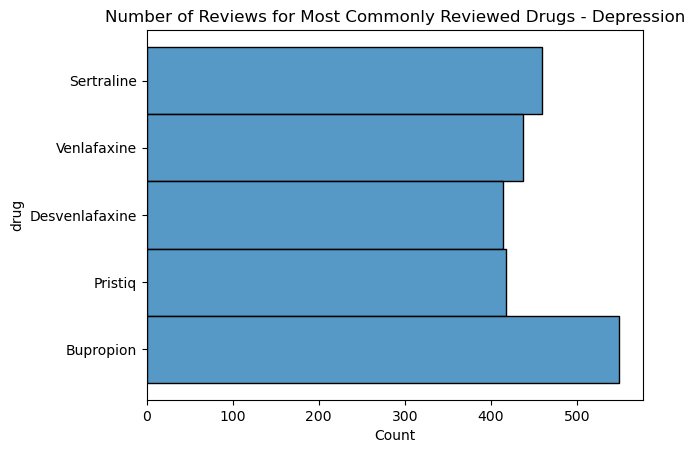

In [33]:
sns.histplot(data=depression_drugs, y='drug').set(
    title= 'Number of Reviews for Most Commonly Reviewed Drugs - Depression');

It can be seen here that Buproprion was the most commonly reviewed drug for depression.

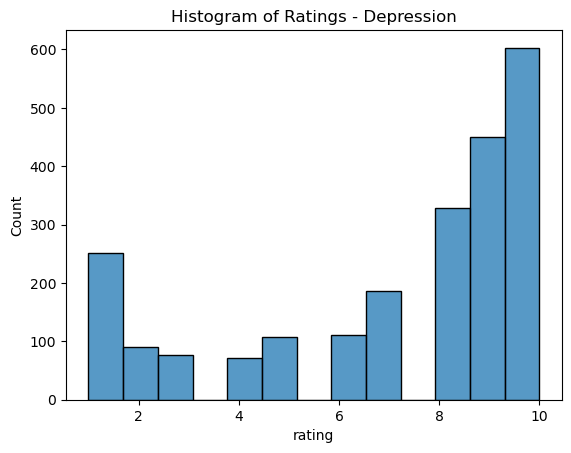

In [34]:
sns.histplot(data=depression_drugs, x='rating').set(
    title= 'Histogram of Ratings - Depression');

*Average Rating of Most Commonly Reviewed Drugs*

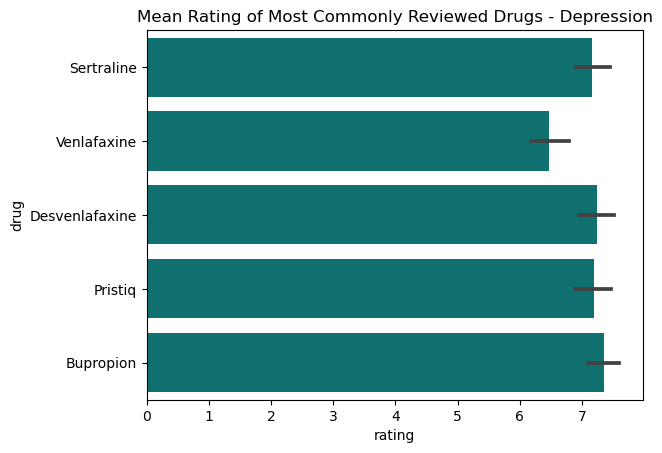

In [35]:
sns.barplot(data=depression_drugs, x='rating', y='drug', orient = 'h', color = 'teal').set(
    title= 'Mean Rating of Most Commonly Reviewed Drugs - Depression');

In [36]:
depression_drugs.groupby('drug')['rating'].mean()

drug
Bupropion         7.358834
Desvenlafaxine    7.239130
Pristiq           7.188995
Sertraline        7.167756
Venlafaxine       6.478261
Name: rating, dtype: float64

As we can see in the barplot and chart above, Venlaxafine is the lowest rated depression drug with a mean rating of 6.48 (below average) whereas the other drugs have a mean rating above 7 (above average.)

#### Highest Rated Depression Medications

In [37]:
depression.groupby('drug')['rating'].mean().sort_values(ascending = False).head(15)

drug
Niravam                             10.000000
Xanax XR                            10.000000
Maprotiline                         10.000000
Norpramin                           10.000000
Asendin                             10.000000
Desipramine                          9.857143
Niacin                               9.857143
Serzone                              9.800000
Amitriptyline / chlordiazepoxide     9.666667
Methylin ER                          9.500000
Limbitrol                            9.500000
Amoxapine                            9.500000
Luvox                                9.333333
Tramadol                             9.288462
Clomipramine                         9.181818
Name: rating, dtype: float64

Above are the depression drugs with the highest average ratings. These range from 9.18 to 10.00.

I will next observe the depression drugs with the lowest average ratings.

#### Lowest Rated Depression Medications

In [38]:
depression.groupby('drug')['rating'].mean().sort_values(ascending = True).head(15)

drug
Tryptophan         1.000000
Vyvanse            3.000000
Luvox CR           4.000000
Pamelor            4.000000
Oleptro            4.000000
Strattera          4.500000
Fetzima            4.621622
Aplenzin           4.750000
Levomilnacipran    4.920000
Zyprexa            5.785714
Effexor            5.845361
Lithium            5.866667
Vortioxetine       5.881159
Trintellix         5.995885
Atomoxetine        6.000000
Name: rating, dtype: float64

The 15 lowest-rated depression medications range from 1.00 to 6.00.

Before I move on to the next condition, I will observe the drugs with the highest average useful count.

#### Highest Average Useful Count

In [39]:
depression.groupby('drug')['usefulcount'].mean().sort_values(ascending = False)

drug
Methylin ER         181.000000
Desyrel             128.000000
Provigil            117.000000
Elavil               99.666667
Norpramin            89.000000
                       ...    
Lisdexamfetamine      2.600000
Amoxapine             2.500000
Vyvanse               2.000000
Protriptyline         0.000000
Vivactil              0.000000
Name: usefulcount, Length: 105, dtype: float64

It appears that Methylin ER, Desyrel, Provigil, Elavil, and Norpramin have the highest average useful count. I may observe these more closely. (It is also worth noting that the highest average useful counts here are much higher than they were in the Birth Control dataset.)

##### Discussion

For those with depression, the most commonly reviewed drug was Buproprion, at approximately 6% of total reviews. Buproprion also had a mean rating of 7.35, which was the most highly rated drug for depression.

I will now move on to observe the subset of Pain.

### Pain

In [40]:
pain = reviews.loc[reviews['condition'] == 'Pain']

pain = pd.DataFrame(pain)

pain.head()

,drug,condition,review,rating,usefulcount
1043,Ibudone,Pain,"""I just started taking this medicine. I have ...",7.0,27
1048,Ultram ODT,Pain,"""You can use ultram to detox yourself from har...",10.0,28
1053,Ultram ODT,Pain,"""I have been using tramadol for eight years fo...",10.0,105
1944,Belbuca,Pain,"""I was on Fentynal patches for year and a hal...",1.0,14
2110,Talacen,Pain,"""I have rheumatoid arthritis and a few other b...",9.0,12


In [41]:
pain.shape

(6145, 5)

Below, I will observe the most common drugs reviewed for pain.

#### Most Common Drugs

In [42]:
pain.drug.value_counts(normalize = True)

Tramadol                       0.058096
Acetaminophen / hydrocodone    0.054028
Oxycodone                      0.045728
Acetaminophen / oxycodone      0.040521
Tapentadol                     0.035151
                                 ...   
Ziconotide                     0.000163
Capsin                         0.000163
Lanacane                       0.000163
Indocin SR                     0.000163
Ibudone                        0.000163
Name: drug, Length: 200, dtype: float64

It appears that the most commonly reviewed drugs for pain are Tramadol, Acetaminophen / hydrocodone, Oxycodone, Acetaminophen / oxycodone, and Tapentadol. It also appears that 200 drugs were reviewed for their effects on pain.

In [43]:
pain_drugs = pain.loc[(pain['drug'] == 'Tramadol') | (pain['drug'] == 'Acetaminophen / hydrocodone') |
                                 (pain['drug'] == 'Oxycodone') | (pain['drug'] == 'Acetaminophen / oxycodone') |
                                  (pain['drug'] == 'Tapentadol')]

pain_drugs.drug.unique()

array(['Tramadol', 'Acetaminophen / oxycodone', 'Tapentadol',
       'Acetaminophen / hydrocodone', 'Oxycodone'], dtype=object)

##### Distribution of Most Common Drugs

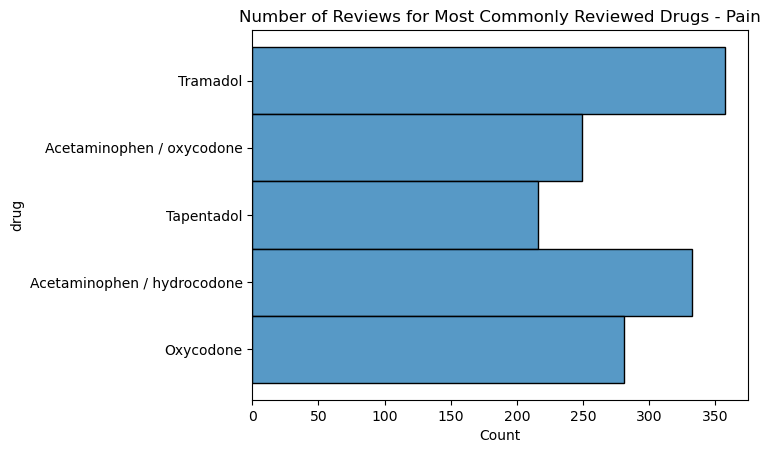

In [44]:
sns.histplot(data= pain_drugs, y = 'drug').set(
    title = 'Number of Reviews for Most Commonly Reviewed Drugs - Pain');

As noted above, Tramadol was the most commonly reviewed drug for pain. Below, I will show the average rating for each of these drugs.

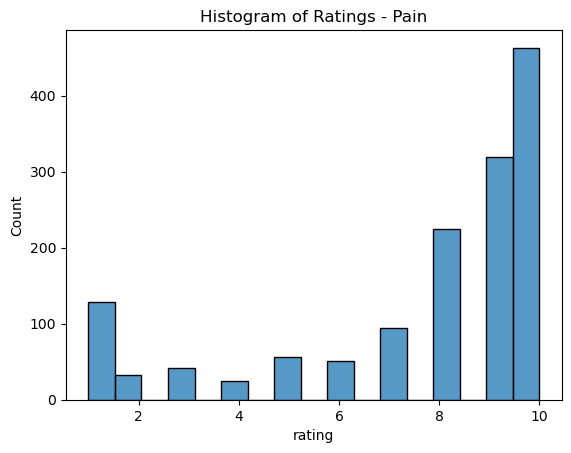

In [45]:
sns.histplot(data= pain_drugs, x = 'rating').set(
    title = 'Histogram of Ratings - Pain');

##### Average Rating of Most Commonly Reviewed Drugs

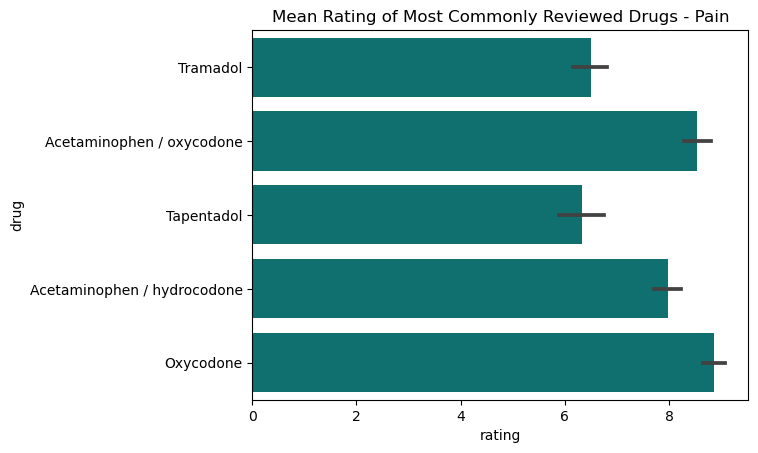

In [46]:
sns.barplot(data = pain_drugs, x='rating', y= 'drug', orient = 'h', color = 'teal').set(
    title = 'Mean Rating of Most Commonly Reviewed Drugs - Pain');

In [47]:
pain_drugs.groupby('drug')['rating'].mean()

drug
Acetaminophen / hydrocodone    7.975904
Acetaminophen / oxycodone      8.546185
Oxycodone                      8.857651
Tapentadol                     6.333333
Tramadol                       6.509804
Name: rating, dtype: float64

In [48]:
pain.rating.mean()

7.6322213181448335

Of the 5 most commonly reviewed drugs for pain, Oxycodone has the highest average rating of 8.86, while Tapentadol has the lowest mean rating of 6.33.

Both Tapentadol and Tramadol have ratings below the mean rating given to reviews for pain medication, whereas the other three are above.

#### Highest Rated Pain Medications

I would like to see the average ratings for each pain drug as a column. I will create this below.

First, I will add the empty column.

Now I will create lists of the drugs and ratings. Below are the drugs with the highest mean ratings. 

In [49]:
pain.groupby('drug')['rating'].mean().sort_values(ascending = False).head(30)

drug
Motrin                             10.000000
Bupivacaine liposome               10.000000
Vitapap                            10.000000
Ultram ODT                         10.000000
Children's Motrin                  10.000000
Aspirin / caffeine                 10.000000
Doans Pills Extra Strength         10.000000
Motrin IB                          10.000000
Anaprox-DS                         10.000000
Roxicodone Intensol                10.000000
Exparel                            10.000000
Feverall                           10.000000
Palladone                          10.000000
Oxyfast                            10.000000
Orudis KT                          10.000000
Lorcet                             10.000000
Magnacet                           10.000000
Magnesium salicylate               10.000000
Maxidone                           10.000000
Medi-Quik Spray                    10.000000
Buprenex                           10.000000
Ketoprofen                          9.750000
Cataf

The top 25 rated pain medications all received a rating of 10, so the top 30 drugs are shown instead. 

I suspect that the 10.00 rated drugs may be drugs with few (yet positive) reviews. I will determine this below.

In [50]:
drug10sample = pain.loc[(pain['drug'] == 'Motrin') | (pain['drug'] == 'Bupivacaine liposome')| 
                        (pain['drug'] == 'Vitapap')]
drug10sample.drug.value_counts()

Bupivacaine liposome    3
Vitapap                 2
Motrin                  1
Name: drug, dtype: int64

Yes, these are drugs that appear infrequently in the dataset for the pain condition. However, their average ratings are still shown above.

#### Lowest Average Rating

In [51]:
pain.groupby('drug')['rating'].mean().sort_values(ascending = True).head(15)

drug
Capsin                     1.000000
Belbuca                    1.000000
Ziconotide                 1.000000
Prialt                     1.000000
Capzasin                   1.000000
Dolobid                    1.000000
Proctofoam                 2.000000
Advil Liqui-Gels           2.000000
Aspirin / oxycodone        2.333333
Tylenol with Codeine #4    2.750000
Hysingla ER                4.176471
Naloxone / oxycodone       4.500000
Camphor / menthol          4.500000
Acetaminophen / codeine    4.946809
Darvocet-N 50              5.000000
Name: rating, dtype: float64

The lowest-rated pain drugs range from mean ratings of 1.00 to 5.00.

#### Highest Average Useful Count

In [52]:
pain.groupby('drug')['usefulcount'].mean().sort_values(ascending = False)

drug
Elavil               135.772727
Pamelor              128.000000
Nortriptyline        112.916667
Amitriptyline         85.937500
Methadone Diskets     84.000000
                        ...    
Prialt                 1.000000
Ziconotide             1.000000
Menthol                0.500000
Proctofoam             0.000000
Lagesic                0.000000
Name: usefulcount, Length: 200, dtype: float64

It appears that Elavil, Pamelor, Nortriptyline, Amitriptyline, and Methadone Diskets are the drugs with reviews of highest average useful count.

I will now move on to observe Anxiety.

### Anxiety

In [53]:
anxiety = reviews.loc[reviews['condition']== 'Anxiety']

anxiety = pd.DataFrame(anxiety)
                          
anxiety.head()

,drug,condition,review,rating,usefulcount
4661,Paxil CR,Anxiety,"""I love it. It works for me very well. I take ...",10.0,20
4665,Paxil CR,Anxiety,"""I was taking Prozac for few years to treat my...",9.0,28
4666,Paxil CR,Anxiety,"""I was taking Paxil for both depression and an...",7.0,43
4668,Paxil CR,Anxiety,"""It will do nothing negative. Give it a try to...",10.0,13
4669,Paxil CR,Anxiety,"""After 5 years on Paxil, then 2 years on Paxil...",8.0,1


In [54]:
anxiety.shape

(5904, 5)

Below, I will observe information for the most commonly reviewed anxiety drugs.

#### Most Common Drugs

In [55]:
anxiety.drug.value_counts(normalize = True)

Escitalopram    0.081978
Alprazolam      0.072493
Buspirone       0.068936
Clonazepam      0.066396
Lexapro         0.063008
                  ...   
Vanspar         0.000169
Serzone         0.000169
Tranxene SD     0.000169
Zetran          0.000169
Nadolol         0.000169
Name: drug, Length: 78, dtype: float64

It appears that the most commonly reviewed anxiety drugs are Escitalopram, Alprazolam, Buspirone, Clonazepam, and Lexapro.

I will create a subset of these in order to observe trends.

In [56]:
anxiety_drugs = anxiety.loc[(anxiety['drug'] == 'Escitalopram') | (anxiety['drug'] == 'Alprazolam') |
                                 (anxiety['drug'] == 'Buspirone') | (anxiety['drug'] == 'Clonazepam') |
                                  (anxiety['drug'] == 'Lexapro')]
anxiety_drugs.drug.unique()

array(['Lexapro', 'Escitalopram', 'Alprazolam', 'Buspirone', 'Clonazepam'],
      dtype=object)

##### Distribution of Most Common Drugs

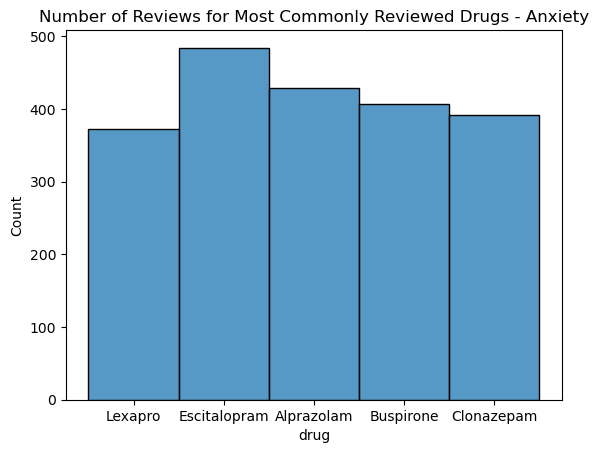

In [57]:
sns.histplot(data = anxiety_drugs, x='drug').set(
    title = 'Number of Reviews for Most Commonly Reviewed Drugs - Anxiety');

As was shown above, Escitalopram is the most commonly reviewed drug for anxiety.

I will next show average rating for each of these drugs.

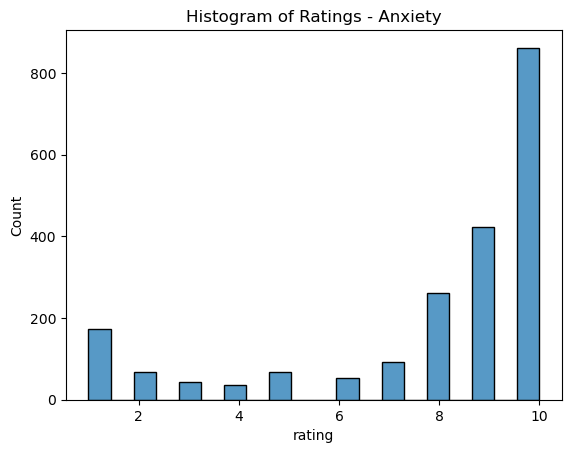

In [58]:
sns.histplot(data = anxiety_drugs, x='rating').set(
    title = 'Histogram of Ratings - Anxiety');

##### Average Rating of Most Commonly Reviewed Drugs

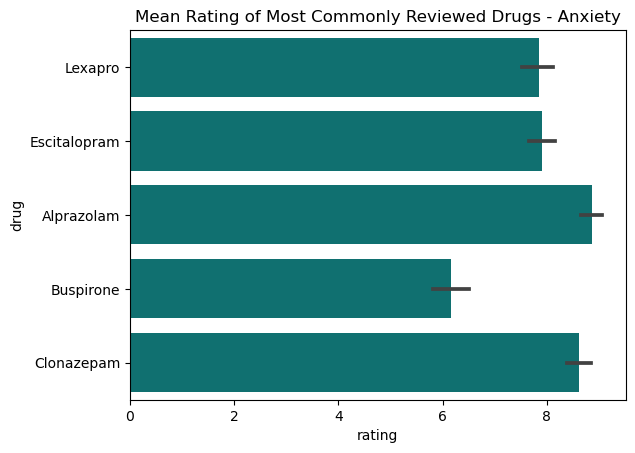

In [59]:
sns.barplot(data = anxiety_drugs, x='rating', y= 'drug', orient = 'h', color = 'teal').set(
    title = 'Mean Rating of Most Commonly Reviewed Drugs - Anxiety');

In [60]:
anxiety_drugs.groupby('drug')['rating'].mean()

drug
Alprazolam      8.869159
Buspirone       6.164619
Clonazepam      8.612245
Escitalopram    7.909091
Lexapro         7.841398
Name: rating, dtype: float64

In [61]:
anxiety.rating.mean()

7.691056910569106

Of the 5 most commonly reviewed anxiety medications, Alprazolam has the highest mean rating of 8.87. The lowest rated medication in this group is Buspirone, with a mean rating of 6.16.

Of the same 5 medications, Buspirone is the only one with a rating below the average rating for anxiety medications, which is 7.69.

Now, I would like to observe the highest and lowest rated medications for all reviews of anxiety medication.

#### Highest Rated Anxiety Medications

In [62]:
anxiety.groupby('drug')['rating'].mean().sort_values(ascending = False).head(15)

drug
Zetran                              10.000000
Phenytoin                           10.000000
Diazepam Intensol                   10.000000
Lorazepam Intensol                  10.000000
Wellbutrin                          10.000000
Micrainin                           10.000000
Alprazolam Intensol                 10.000000
Tranxene SD                         10.000000
Pexeva                              10.000000
Niravam                              9.800000
Amitriptyline / chlordiazepoxide     9.666667
Klonopin Wafer                       9.600000
Limbitrol DS                         9.500000
Triavil                              9.500000
Amitriptyline / perphenazine         9.500000
Name: rating, dtype: float64

The 15 top-rated medications range from 9.50 to 10.00.

#### Lowest Rated Anxiety Medications

In [63]:
anxiety.groupby('drug')['rating'].mean().sort_values(ascending = True).head(15)

drug
Vanspar             1.000000
Compazine           3.666667
Oxcarbazepine       4.444444
Catapres            4.500000
Stelazine           5.000000
Nefazodone          5.000000
Prochlorperazine    5.333333
Hydroxyzine         5.679365
Vistaril            5.712766
Wellbutrin XL       6.000000
Trifluoperazine     6.000000
Nadolol             6.000000
Risperidone         6.047619
Buspirone           6.164619
Atarax              6.260000
Name: rating, dtype: float64

The 15 lowest-rated anxiety medications range from 1.00 to 6.26. 

#### Highest Average Useful Count

In [64]:
anxiety.groupby('drug')['usefulcount'].mean().sort_values(ascending = False)

drug
Wellbutrin                          150.000000
Neurontin                           145.222222
Viibryd                             132.800000
Tenormin                            116.000000
Desyrel                             105.000000
                                       ...    
Nefazodone                           12.500000
Vanspar                              10.000000
Amitriptyline / chlordiazepoxide      9.333333
Trifluoperazine                       4.333333
Micrainin                             3.000000
Name: usefulcount, Length: 78, dtype: float64

It appears that on average, the drugs with reviews engendering the highest useful counts are Wellbutrin, Neurotin, Viibryd, Tenormin, and Desyrel.

A medical professional or researcher interested in learning more about which depression medication reviews people find most useful could make use of this information.

I will now move on to observe the final condition of interest, which is acne.

### Acne

In [65]:
acne = reviews.loc[reviews['condition']== 'Acne']

acne = pd.DataFrame(acne)
                          
acne.head()

,drug,condition,review,rating,usefulcount
600,Resorcinol / sulfur,Acne,"""Have loved this product since I began using i...",10.0,3
1940,Dynacin,Acne,"""This drug is very helpful. I used to have pus...",8.0,10
2455,Altabax,Acne,"""Hi I get pimples on my face, nose area especi...",9.0,4
2456,Altabax,Acne,"""I was prescribed this after not having luck w...",8.0,2
3901,Aldactone,Acne,"""I have been taking Aldactone for adult hormon...",10.0,140


In [66]:
acne.shape

(5588, 5)

There are 5,588 reviews for acne medications.

Below, I will observe the information for most commonly reviewed acne drugs.

#### Most Common Drugs

In [67]:
acne.drug.value_counts(normalize = True)

Isotretinoin                    0.092520
Adapalene / benzoyl peroxide    0.071045
Epiduo                          0.070508
Doxycycline                     0.064603
Accutane                        0.057445
                                  ...   
BP Wash                         0.000179
Hexachlorophene                 0.000179
Clindagel                       0.000179
Avita                           0.000179
Resorcinol / sulfur             0.000179
Name: drug, Length: 117, dtype: float64

It appears that there are 117 acne medications represented. The most common are Isotretinoin, Adapalene / benzoyl peroxide, Epiduo, Doxycycline, and Accutane.

I will create a subset in order to determine more.

In [68]:
acne_drugs = acne.loc[(acne['drug'] == 'Isotretinoin') | (acne['drug'] == 'Adapalene / benzoyl peroxide') |
                                 (acne['drug'] == 'Epiduo') | (acne['drug'] == 'Doxycycline') |
                                  (acne['drug'] == 'Accutane')]
acne_drugs.drug.unique()

array(['Epiduo', 'Isotretinoin', 'Doxycycline', 'Accutane',
       'Adapalene / benzoyl peroxide'], dtype=object)

I will now observe the attributes of this group.

##### Distribution of Most Common Drugs

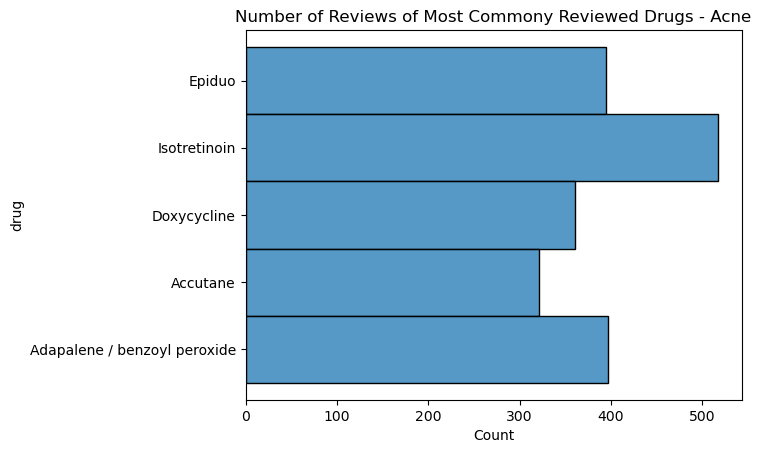

In [69]:
sns.histplot(data = acne_drugs, y='drug').set(
    title = 'Number of Reviews of Most Commony Reviewed Drugs - Acne');

As was shown above, Isotretinoin was the most commonly reviewed acne drug.

Next, I will show the average rating for each of these commonly reviewed acne drugs.

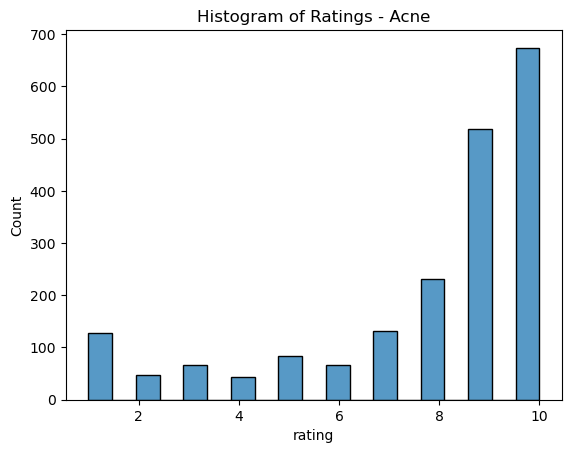

In [70]:
sns.histplot(data = acne_drugs, x='rating').set(
    title = 'Histogram of Ratings - Acne');

##### Average Rating of Most Commonly Reviewed Drugs

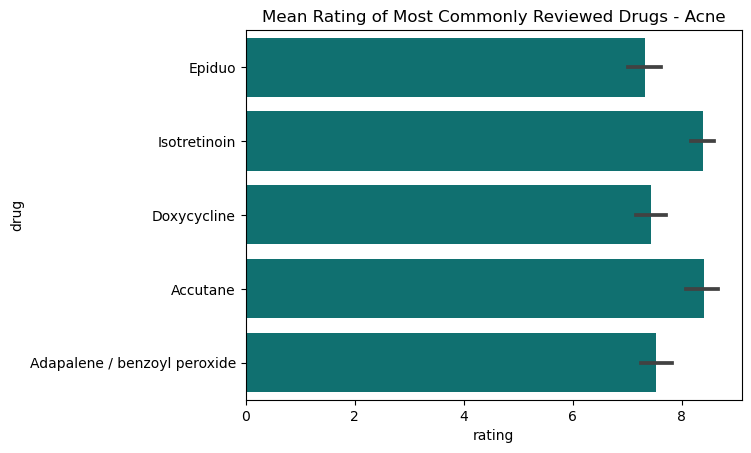

In [71]:
sns.barplot(data = acne_drugs, x='rating', y= 'drug', orient = 'h', color = 'teal').set(
    title = 'Mean Rating of Most Commonly Reviewed Drugs - Acne');

In [72]:
acne_drugs.groupby('drug')['rating'].mean()

drug
Accutane                        8.401869
Adapalene / benzoyl peroxide    7.521411
Doxycycline                     7.437673
Epiduo                          7.332487
Isotretinoin                    8.381044
Name: rating, dtype: float64

In [73]:
acne.rating.mean()

7.374194702934861

Of the 5 most commonly reviewed acne drugs, the most highly rated on average is Accutane with a mean rating of 8.40. Of the same 5 drugs, only Epiduo had a mean rating less than the mean rating of all acne drugs reviewed (7.33, compared to dataset acne rating mean of 7.37.)

With this in mind, I will move on to observe the highest rated acne medications for the entire dataset.

#### Highest Rated Acne Medications

In [74]:
acne.groupby('drug')['rating'].mean().sort_values(ascending = False).head(30)

drug
Hexachlorophene                      10.000000
Oxy-10                               10.000000
Salicylic acid / sulfur              10.000000
Salicylic acid                       10.000000
Septra                               10.000000
Clindagel                            10.000000
Resorcinol / sulfur                  10.000000
Pernox                               10.000000
PanOxyl 10% Acne Foaming Wash        10.000000
Avita                                10.000000
Benzoyl peroxide / hydrocortisone    10.000000
Avar                                 10.000000
Sulfur                               10.000000
NuOx                                 10.000000
Ery Pads                             10.000000
Erythromycin                         10.000000
Norinyl 1+35                         10.000000
Fostex Medicated                     10.000000
Benzoyl peroxide / sulfur            10.000000
Aldactone                             9.750000
PanOxyl                               9.600000
Clarifoa

The highest rated acne medications are shown above. The top 30 are shown, as the top 15 all have average ratings of 10.00. The top 30-rated medications range from 8.90 - 10.00.

#### Lowest Rated Acne Medications

In [75]:
acne.groupby('drug')['rating'].mean().sort_values(ascending = True).head(15)

drug
femhrt                               1.000000
Tri-Estarylla                        1.500000
Loestrin Fe 1 / 20                   2.000000
Junel Fe 1.5 / 30                    2.000000
Microgestin Fe 1.5 / 30              2.800000
Loestrin 24 Fe                       3.206897
Ethinyl estradiol / norethindrone    3.906977
Gildess Fe 1 / 20                    4.111111
Microgestin Fe 1 / 20                4.285714
Gildess Fe 1.5 / 30                  4.500000
Tri-Linyah                           5.000000
Tri-Sprintec                         5.388060
Estarylla                            5.500000
Absorica                             5.500000
Ortho Tri-Cyclen                     5.641026
Name: rating, dtype: float64

The lowest rated acne medications are shown above. The top 15-rated medications range from 1.00 to 5.64.

#### Highest Average Useful Count

In [76]:
acne.groupby('drug')['usefulcount'].mean().sort_values(ascending = False)

drug
Aldactone                            95.500000
Milk of Magnesia                     44.000000
Retin-A                              36.718750
Clindamycin                          33.877551
Clindagel                            32.000000
                                       ...    
Tri-Estarylla                         0.500000
Junel Fe 1.5 / 30                     0.500000
Loestrin Fe 1 / 20                    0.000000
Benzoyl peroxide / salicylic acid     0.000000
Benzoyl peroxide / hydrocortisone     0.000000
Name: usefulcount, Length: 117, dtype: float64

It appears that the drugs with reviews generating the highest average useful count are: Aldactone, Milk of Magnesia, Retin-A, Clindamycin, and Clindagel.

Before moving on to select a specific condition for further analysis, I will observe more information regarding ratings and useful counts.

### 3. Rating & Useful Count

Here, I will observe to see how ratings correlate with the useful count.

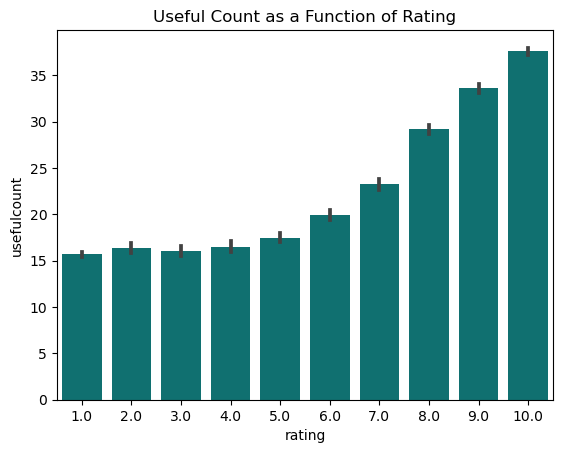

In [77]:
sns.barplot(data = reviews, x='rating', y= 'usefulcount', color = 'teal').set(
    title = 'Useful Count as a Function of Rating');

It appears that generally, the higher the rating given by the viewer, the more times it was described as useful.

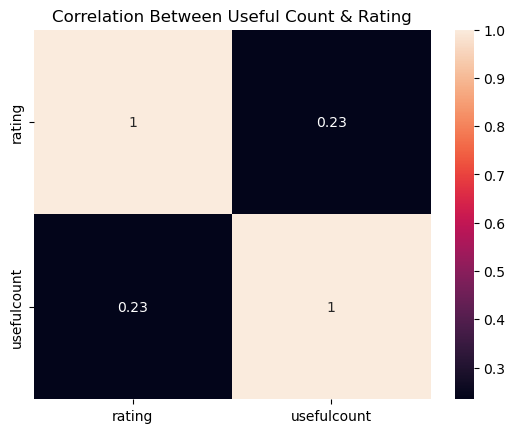

In [78]:
sns.heatmap(data = reviews.corr(), annot = True).set(
    title = 'Correlation Between Useful Count & Rating');

It appears that overall, there is a fair correlation (0.23) between rating and usefulness count.

With the information presented regarding medications for the 5 most common health conditions in the dataset, researchers and/or medical professionals could learn more about which medications are rated highly/lowly for each condition. They could also get a sense of what information patients find most "useful."

In the next notebook, I will go on to observe medications for one particular condition, which is pain.